In [1]:
import numpy as np
import pandas as pd

In [2]:
# import plotnine objects
from plotnine import *

In [3]:
def group_date(date):
    if date.month > 6:
        semester=2
    else:
        semester=1
    return date.strftime('%Y') + "-" + str(semester)
def daysbetween(date1, date2):
    grouping=[365,1800,2800,999999]
    values=["very short", "short", "mid", "long"]
    delta=date2 - date1
    days=delta.days
    group=0
    for index, group_max_days in enumerate(grouping):
        if days <= group_max_days:
            group = index
            break
    return values[group]

In [4]:
df = pd.read_csv('Users.csv', usecols=[1,2,3,4,5])
df = df.astype({'CreationDate': 'datetime64',
               'LastAccessDate': 'datetime64'})
df['Location'] = df.Location.astype(str)
df.head()

,Age,CreationDate,LastAccessDate,Location,Reputation
0,0,2008-07-31 00:00:00.000,2008-08-26 00:16:53.810,on the server farm,1
1,0,2008-07-31 14:22:31.287,2018-10-29 01:22:39.303,"El Cerrito, CA",45009
2,0,2008-07-31 14:22:31.287,2018-11-30 22:29:47.533,"Corvallis, OR",3509
3,0,2008-07-31 14:22:31.287,2018-11-30 18:40:21.677,"Raleigh, NC, United States",13503
4,0,2008-07-31 14:22:31.317,2018-12-01 15:33:40.507,"New York, NY",28953


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9737247 entries, 0 to 9737246
Data columns (total 6 columns):
Age                          int64
CreationDate                 datetime64[ns]
LastAccessDate               datetime64[ns]
Location                     object
Reputation                   int64
DaysBetweenCreationAccess    object
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 445.7+ MB


In [6]:
df.describe(include='all')

,Age,CreationDate,LastAccessDate,Location,Reputation
count,9737247.0,9737247,9737247,9737247,9.737247e+06
unique,NaN,9736300,9726637,165102,NaN
top,NaN,2008-07-31 14:22:31.287000,2018-11-30 15:43:42.443000,nan,NaN
freq,NaN,3,4,7386885,NaN
first,NaN,2008-07-31 00:00:00,2008-08-01 00:59:11.147000,NaN,NaN
last,NaN,2018-12-02 04:49:02.637000,2018-12-02 04:50:40.037000,NaN,NaN
mean,0.0,NaN,NaN,NaN,1.088793e+02
std,0.0,NaN,NaN,NaN,2.279600e+03
min,0.0,NaN,NaN,NaN,1.000000e+00
25%,0.0,NaN,NaN,NaN,1.000000e+00


In [8]:
df['CreationDateSemester'] = df.apply(lambda row: group_date(row['CreationDate']),axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9737247 entries, 0 to 9737246
Data columns (total 7 columns):
Age                          int64
CreationDate                 datetime64[ns]
LastAccessDate               datetime64[ns]
Location                     object
Reputation                   int64
DaysBetweenCreationAccess    object
CreationDateSemester         object
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 520.0+ MB


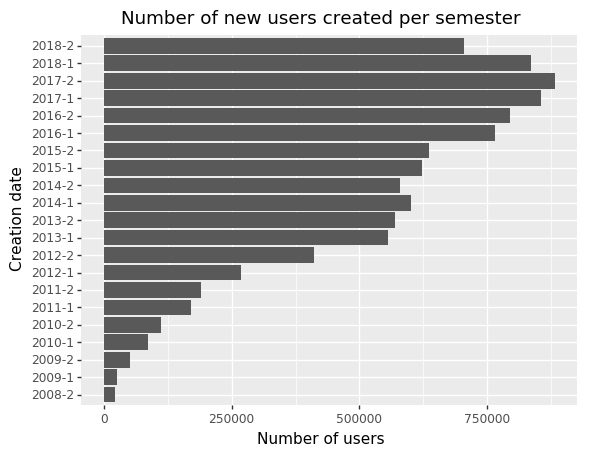

<ggplot: (-9223371863948744942)>

In [9]:
plot = ggplot(df, aes(x='CreationDateSemester'))
plot += geom_bar(stat="count")
plot += ggtitle("Number of new users created per semester")
plot += ylab("Number of users")
plot += xlab("Creation date")
plot += coord_flip()
plot

In [5]:
df['DaysBetweenCreationAccess'] = df.apply(lambda row: daysbetween(row['CreationDate'], row['LastAccessDate']),axis=1)
df.head()

,Age,CreationDate,LastAccessDate,Location,Reputation,DaysBetweenCreationAccess
0,0,2008-07-31 00:00:00.000,2008-08-26 00:16:53.810,on the server farm,1,very short
1,0,2008-07-31 14:22:31.287,2018-10-29 01:22:39.303,"El Cerrito, CA",45009,long
2,0,2008-07-31 14:22:31.287,2018-11-30 22:29:47.533,"Corvallis, OR",3509,long
3,0,2008-07-31 14:22:31.287,2018-11-30 18:40:21.677,"Raleigh, NC, United States",13503,long
4,0,2008-07-31 14:22:31.317,2018-12-01 15:33:40.507,"New York, NY",28953,long


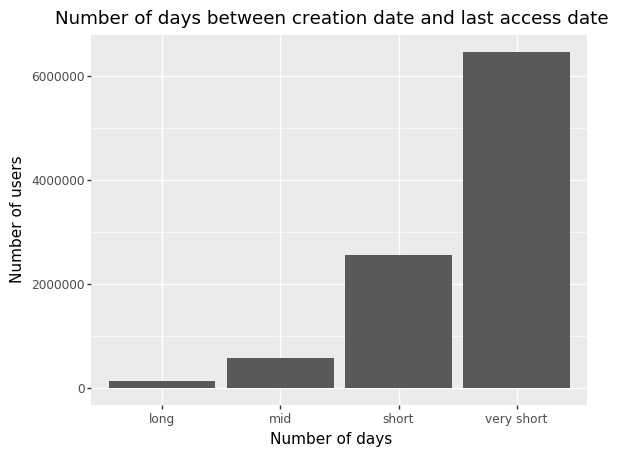

<ggplot: (-9223371863948767509)>

In [6]:
plot = ggplot(df, aes(x="DaysBetweenCreationAccess"))
plot += geom_bar(stat="count")
plot += ggtitle("Number of days between creation date and last access date")
plot += xlab("Number of days")
plot += ylab("Number of users")
plot